Скачаем данные

In [39]:
import pandas as pd
import matplotlib as plt
import numpy as np

Загрузите данные из файла ```flights.csv```

In [40]:
data = pd.read_csv("flights.csv")

In [41]:
cnt = 0

Наша целевая переменная для классификации: ```Cancelled```, а для регрессии -- ```AirTime``` Сохраним их отдельно и удалим из основных данных

In [42]:
y = data.Cancelled
y_regression = data.AirTime.fillna(0)

data = data.drop(['AirTime','Cancelled'], axis=1)

In [43]:
leaky_features = ["CancellationCode", "Year", "Diverted", "ArrTime", "ActualElapsedTime",
                  "ActualElapsedTime", "ArrDelay", "TaxiIn","TaxiOut", "CarrierDelay",
                  'TailNum', "WeatherDelay", "NASDelay", "SecurityDelay","LateAircraftDelay",'DepTime', 'DepDelay']

```leaky_features``` -- это фичи, которые мы знаем только если знаем целевую. Если модель обучится на них, она не сможет давать предсказания для новых данных.

Удалите эти фичи из данных

In [44]:
data = data.drop(["CancellationCode", "Year", "Diverted", "ArrTime", "ActualElapsedTime",
                  "ActualElapsedTime", "ArrDelay", "TaxiIn","TaxiOut", "CarrierDelay",
                  'TailNum', "WeatherDelay", "NASDelay", "SecurityDelay","LateAircraftDelay", "DepTime", "DepDelay"], axis=1)

Посмотрите на гистограммы признаков. Можно ли какие-то удалить? Почему? 

In [45]:
data

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,CRSElapsedTime,Origin,Dest,Distance
0,1,3,4,1955,2225,WN,335,150,IAD,TPA,810
1,1,3,4,735,1000,WN,3231,145,IAD,TPA,810
2,1,3,4,620,750,WN,448,90,IND,BWI,515
3,1,3,4,930,1100,WN,1746,90,IND,BWI,515
4,1,3,4,1755,1925,WN,3920,90,IND,BWI,515
...,...,...,...,...,...,...,...,...,...,...,...
99994,1,24,4,1935,2257,XE,7676,142,SLC,OKC,866
99995,1,25,5,1935,2257,XE,7676,142,SLC,OKC,866
99996,1,26,6,1935,2257,XE,7676,142,SLC,OKC,866
99997,1,27,7,1935,2257,XE,7676,142,SLC,OKC,866


<Axes: >

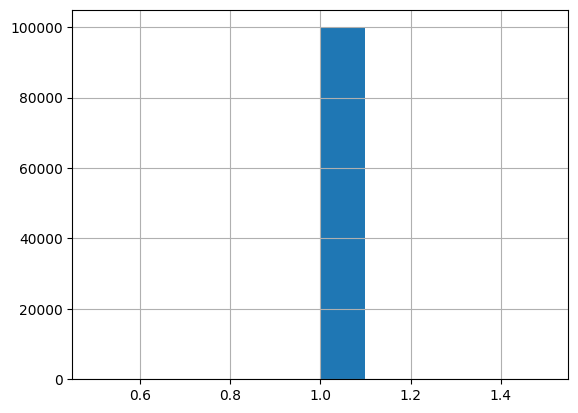

In [46]:
data['Month'].hist()

<Axes: >

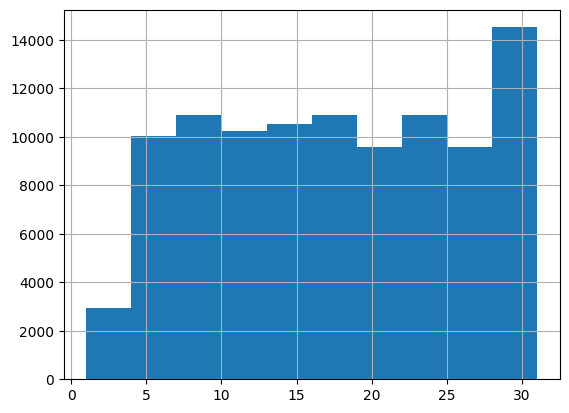

In [47]:
data['DayofMonth'].hist()

<Axes: >

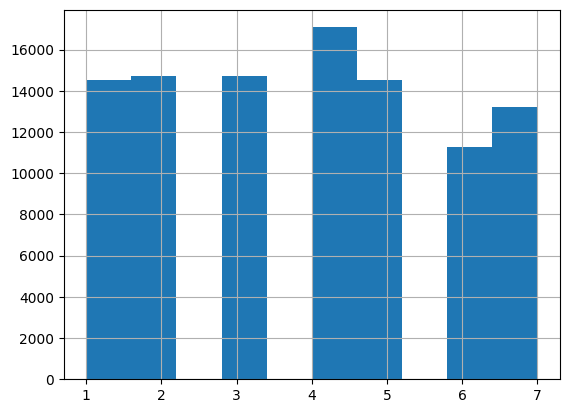

In [48]:
data['DayOfWeek'].hist()

<Axes: >

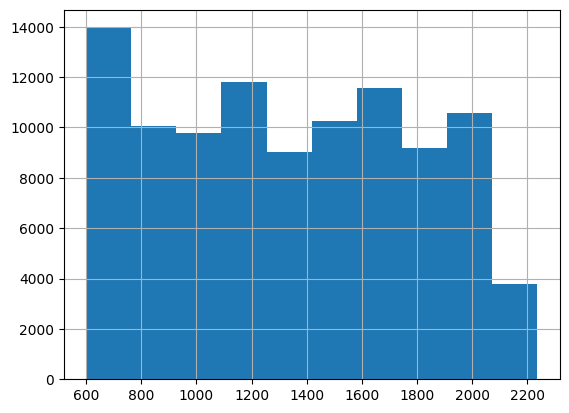

In [49]:
data['CRSDepTime'].hist()

<Axes: >

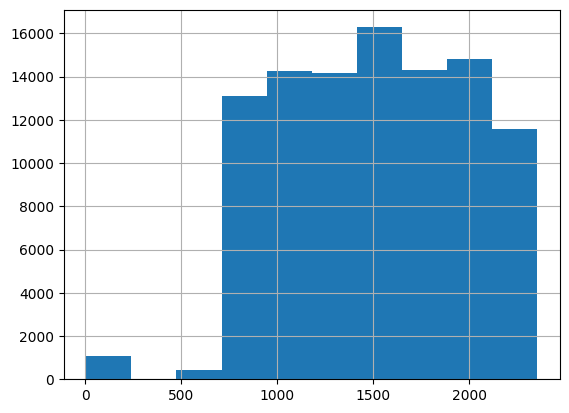

In [50]:
data['CRSArrTime'].hist()

<Axes: >

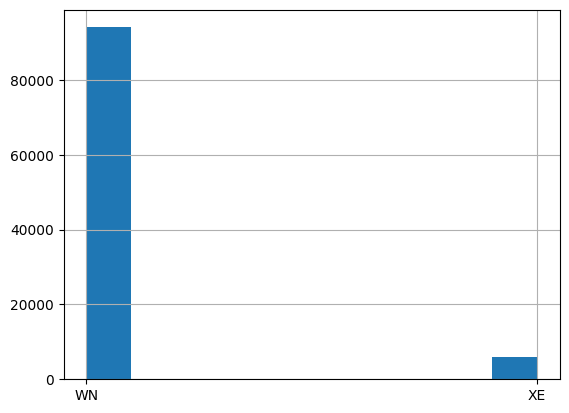

In [51]:
data['UniqueCarrier'].hist()

<Axes: >

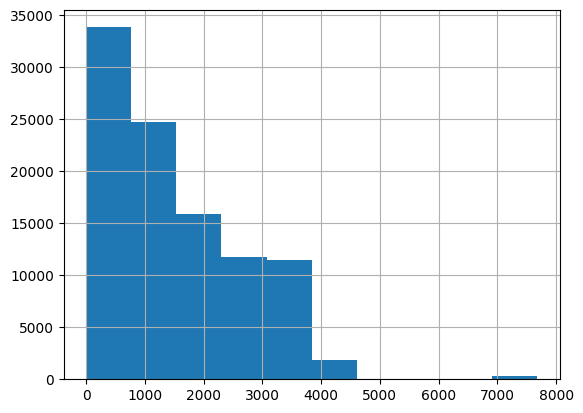

In [52]:
data['FlightNum'].hist()

<Axes: >

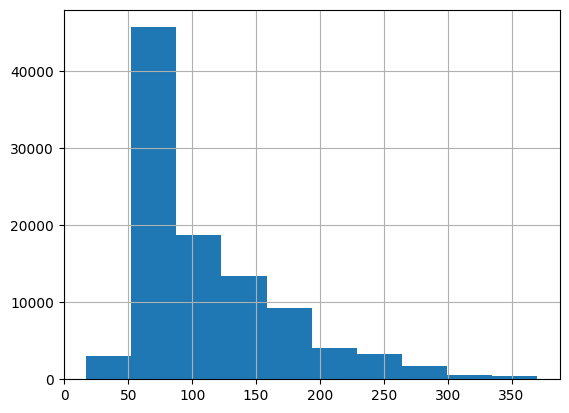

In [53]:
data['CRSElapsedTime'].hist()

<Axes: >

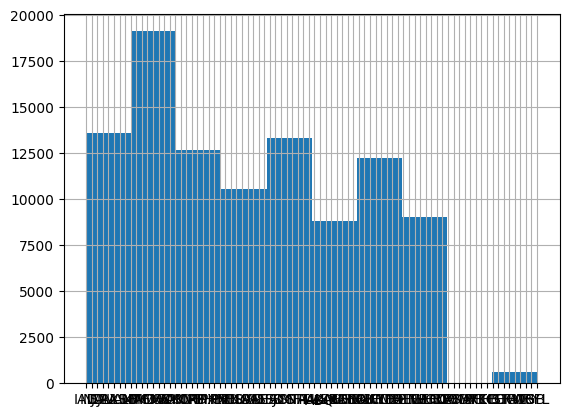

In [54]:
data['Origin'].hist()

<Axes: >

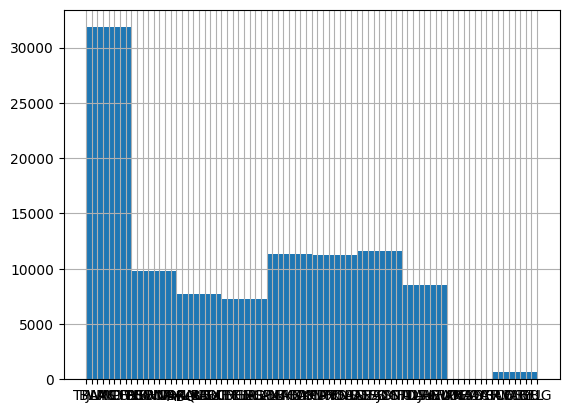

In [55]:
data['Dest'].hist()

<Axes: >

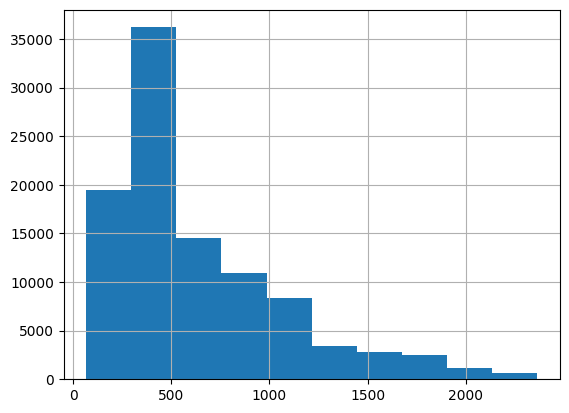

In [56]:
data['Distance'].hist()

Удалите бесполезные признаки, выбранные вами на предыдущем шаге

In [57]:
#data['Month'] можно удалить, так как они везде одинаковый

In [58]:
data = data.drop(['Month'], axis=1)

Переведите все категориальные признаки в числовые. 
Значения признанов, встречающиеся менее 50 раз замените на значение ```Rare```.

Если значение ```Rare``` встречается меньше 50 раз, не надо добавлять его как отдельную колонку.

(если это задание не получается, просто удалите категориальные признаки, но это будет стоить вам баллов)

Подсказка: можете использовать pd.get_dummies (Можно использовать tab и shift+tab для того, чтобы открыть документацию)

In [59]:
#for col in data.columns:
#    if data[col].dtype == 'object': # Выбираем категориальные признаки
        

In [60]:
# cnt = 0
# data_makeint1 = pd.get_dummies(data['UniqueCarrier'], prefix='is_')
# for col in data_makeint1.columns:
#     data_makeint1[col] = data_makeint1[col].astype(int)
# for col in data_makeint1.columns:
#     if col != "is_UniqueCarrier_Rare":
#         if data_makeint1[col].sum() < 50:
#             for row in range(len(data_makeint1)):
#                 data_makeint1 = data_makeint1.drop([row], axis=0)

In [61]:
from tqdm import tqdm

In [62]:
for col in tqdm(data.columns):
    if data[col].dtype == 'object': # Выбираем категориальные признаки
        counts = data[col].value_counts()
        rare_columns = counts[counts < 50].index
        if len(rare_columns) > 0:
            data.loc[data[col].isin(rare_columns), col] = 'Rare'

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 335.53it/s]


In [63]:
for col in tqdm(data.select_dtypes(include=['object']).columns):
    new_columns = pd.get_dummies(data[col], prefix=col)

    if 'Rare' in data[col].values and data[col].value_counts()['Rare'] < 50:
        new_columns = new_columns.drop(f"{col}_Rare", axis=1)

    data = pd.concat([data, new_columns], axis=1)
    data = data.drop(col, axis=1)

100%|██████████| 3/3 [00:00<00:00, 36.79it/s]


In [64]:
# cnt = 0
# data_makeint2 = pd.get_dummies(data['Origin'], prefix='is_')
# for col in data_makeint2.columns:
#     data_makeint2[col] = data_makeint2[col].astype(int)
# for row in tqdm(range(len(data_makeint2))):
#     for col in data_makeint2.columns:
#         if col != "is_Origin_Rare":
#             if data_makeint2[col].sum() < 50:
#                 if data_makeint2[col].iloc[row] == 1:
#                     try:
#                         data_makeint2 = data_makeint2.drop([row], axis=0)
#                     except:
#                         pass


In [65]:
# cnt = 0
# data_makeint3 = pd.get_dummies(data['Origin'], prefix='is_')
# for col in data_makeint3.columns:
#     data_makeint3[col] = data_makeint3[col].astype(int)
# for row in tqdm(range(len(data_makeint3))):
#     for col in data_makeint3.columns:
#         if col != "is_Origin_Rare":
#             if data_makeint3[col].sum() < 50:
#                 if data_makeint3[col].iloc[row] == 1:
#                     try:
#                         data_makeint2 = data_makeint2.drop([row], axis=0)
#                     except:
#                         pass

In [66]:
# data = pd.concat([data, data_makeint1] , axis=1)
# data = pd.concat([data, data_makeint2] , axis=1)
# data = pd.concat([data, data_makeint3] , axis=1)

Заполните отсутствующие значения на своё усмторение

In [67]:
data = data.fillna(data.mean())

Отшкалируйте (стандартизируйте) данные

In [68]:
X = data.values.astype('float32')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [69]:
assert np.isfinite(X).all()

Разделим данные на обучающие/тестовые (НЕ ТРОГАЙТЕ ЭТУ КЛЕТКУ!)

In [70]:
np.random.seed(42)
test_inds = np.arange(X.shape[0])
np.random.shuffle(test_inds)

test_inds = test_inds[:1000]

is_test = np.zeros(X.shape[0], dtype='bool')
is_test[test_inds] = True

X_train = X[~is_test]
X_test = X[is_test]
y_train = y[~is_test]
y_test = y[is_test]
y_regression_train = y_regression[~is_test]
y_regression_test = y_regression[is_test]


Обучите несколько моделей, предсказыаающих ```y```

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [93]:
hist_boosting = HistGradientBoostingClassifier()
hist_boosting.fit(X_train, y_train)


HistGradientBoostingClassifier()

In [94]:
hist_train = hist_boosting.predict_proba(X_train)[:, 1]
hist_test = hist_boosting.predict_proba(X_test)[:, 1]

In [96]:
boosting = GradientBoostingClassifier()
boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [97]:
boosting_train = boosting.predict_proba(X_train)[:, 1]
boosting_test = boosting.predict_proba(X_test)[:, 1]

In [98]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
forest_train = forest.predict_proba(X_train)[:, 1]
forest_test = forest.predict_proba(X_test)[:, 1]

Какие метрики измерения качества классификации вы знаете? Что можно сказать об их применимости к данной задаче?

Ответ: Автоматические (Precision, Recall) и не автоматические. Используем первые, так как тут они подойдут, при чем обе

Постройте ROC кривые для обученных моделей. Вычислите roc_auc для этих моделей.

Подсказка: можете использовать sklearn.metrics

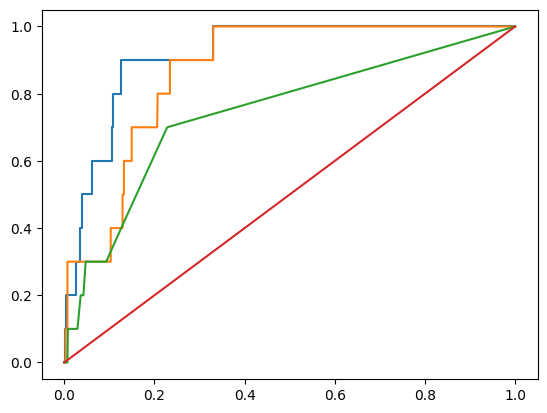

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

recall_0, recall_1, thresholds = roc_curve(y_test, hist_test)
plt.plot(recall_0, recall_1)

recall_0, recall_1, thresholds = roc_curve(y_test, boosting_test)
plt.plot(recall_0, recall_1)

recall_0, recall_1, thresholds = roc_curve(y_test, forest_test)
plt.plot(recall_0, recall_1)

tpr, fpr, thresholds_r = roc_curve(y_test, [0.5] * len(y_test))

plt.plot(fpr, tpr)
plt.show()

In [104]:
from sklearn.metrics import roc_auc_score
print(f"HistGradientBoostng: {roc_auc_score(y_test, hist_test)}")
print(f"RandomForest: {roc_auc_score(y_test, forest_test)}")
print(f"GradientBoostnig: {roc_auc_score(y_train, boosting_train)}")

HistGradientBoostng: 0.9165656565656566
RandomForest: 0.7430808080808081
GradientBoostnig: 0.8543077870410485


Продолжайте обучать модели пока не получите roc_auc хотя бы 0.8 на тестовых данных

In [103]:
#С первого раза сделал, выше

Постройте график Precision-recall для всех моделей.

Выберете модель и порог, при которых самый большой precision при recall не меньше 0.05

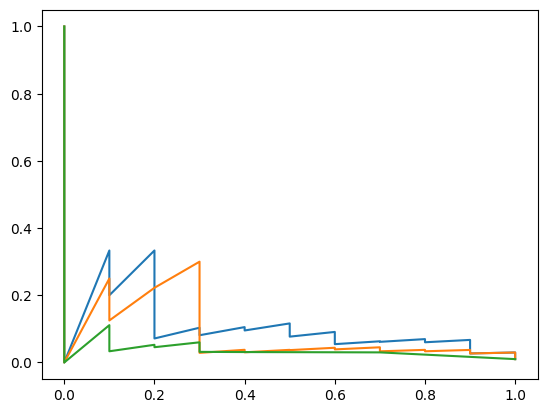

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_test, hist_test)
plt.plot(recall, precision)
precision, recall, thresholds = precision_recall_curve(y_test, boosting_test)
plt.plot(recall, precision)
precision, recall, thresholds = precision_recall_curve(y_test, forest_test)
plt.plot(recall, precision)


plt.show()

Посмотрите на важности признаков по мнениям моделей. Что можно сказать? В каких аэропортах больше всего отменяют рейсы? А в каких меньше?

In [106]:
for value, name in sorted(zip(forest.feature_importances_, data.columns), reverse=True):
    print(round(value*100, 2), "-", name)

34.0 - DayofMonth
17.59 - DayOfWeek
11.1 - FlightNum
10.64 - CRSArrTime
10.52 - CRSDepTime
3.23 - CRSElapsedTime
3.0 - Distance
0.31 - Dest_LAS
0.27 - Origin_LAS
0.27 - Dest_PHX
0.26 - Origin_MDW
0.26 - Dest_MDW
0.25 - Origin_OAK
0.25 - Dest_LAX
0.25 - Origin_SFO
0.23 - Dest_SFO
0.23 - Origin_RNO
0.23 - Origin_LAX
0.23 - Origin_PHX
0.22 - Dest_SAN
0.22 - Origin_SAN
0.2 - Dest_OAK
0.19 - Origin_SMF
0.17 - Origin_HOU
0.16 - Dest_SMF
0.16 - Dest_HOU
0.16 - Dest_RNO
0.15 - Dest_SJC
0.15 - Origin_ONT
0.14 - Dest_BUR
0.13 - Origin_SJC
0.13 - Dest_ONT
0.13 - Dest_BWI
0.12 - Dest_GEG
0.12 - Origin_BUR
0.12 - Dest_STL
0.12 - Origin_GEG
0.12 - Origin_BUF
0.11 - Origin_STL
0.11 - Origin_BWI
0.11 - Origin_PHL
0.11 - Origin_MCI
0.1 - Dest_BUF
0.09 - Dest_TPA
0.09 - UniqueCarrier_WN
0.09 - Dest_PHL
0.09 - Dest_DAL
0.09 - Origin_ABQ
0.08 - Origin_DAL
0.08 - Origin_PDX
0.08 - Origin_MCO
0.07 - Origin_SAT
0.07 - Dest_SAT
0.07 - Dest_ABQ
0.07 - Dest_MCI
0.07 - UniqueCarrier_XE
0.07 - Origin_BNA
0.07 - O

In [ ]:
#HistBoosting так не умеет, а у RandomForest roc_auc меньше 0,8 поэтому на него смотреть нет смысла. Чаще всего отменяют в LAS, а меньше всего в LBB.

Обучите модели для регрессии ```y_regression``` (Почти для каждой модели классификации есть аналогичная модель регрессии)

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
boosting2 = GradientBoostingRegressor()
boosting2.fit(X_train, y_regression_train)

GradientBoostingRegressor()

In [121]:
predicted_X_boosting = boosting2.predict(X_test)

Посчитайте MSE для каждой модели. Какая работает лучше всего?

In [116]:
from sklearn.ensemble import HistGradientBoostingRegressor
hist_boosting2 = HistGradientBoostingRegressor()
hist_boosting2.fit(X_train, y_regression_train)

HistGradientBoostingRegressor()

In [120]:
predicted_X_hist_boosting = hist_boosting2.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error

In [123]:
print(f"GradientBoosting: {mean_squared_error(y_regression_test,predicted_X_boosting)})")
print(f"HistGradientBoosting: {mean_squared_error(y_regression_test, predicted_X_hist_boosting)}")

GradientBoosting: 123.81036611183183)
HistGradientBoosting: 115.27961641896914


Получите MSE как минимум 200